# Read and Explore Data

In [1]:
# from google.colab import drive
# drive.mount('/content/gdrive')
import pandas as pd
from datetime import datetime
start_time = datetime.now()

# %pip install --user -U nltk
# %pip install pandas-profiling
# %pip install mlxtend
# %pip install surprise
# %pip install spotlight
# %pip install scipy == 1.1.0
# %pip install lifetimes
# %pip install plotly
# %pip install wordcloud

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.cm as cm

print('LOAD TIME: ',datetime.now() - start_time) # Load duration about 2 minutes

LOAD TIME:  0:00:00


In [2]:
df_initial = pd.read_csv('car_price_prediction.csv',encoding="ISO-8859-1",
                         dtype={'CustomerID': str,'InvoiceID': str})

print('Dataframe dimensions:', df_initial.shape)

df_initial

Dataframe dimensions: (19237, 18)


,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


Explor data, have a look for what type of data in this dataset

In [3]:
df_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [4]:
typesOfData={}
for i in df_initial.columns:
    print("-----------------------------------------------------------------------------------")
    print(i)
    print(df_initial[i].unique())
    typesOfData[i]=len(df_initial[i].unique())

print("-----------------------------------------------------------------------------------")
print("Number of Unique data in each column: {}".format(typesOfData))

-----------------------------------------------------------------------------------
ID
[45654403 44731507 45774419 ... 45804997 45793526 45813273]
-----------------------------------------------------------------------------------
Price
[13328 16621  8467 ... 56814 63886 22075]
-----------------------------------------------------------------------------------
Levy
['1399' '1018' '-' '862' '446' '891' '761' '751' '394' '1053' '1055'
 '1079' '810' '2386' '1850' '531' '586' '1249' '2455' '583' '1537' '1288'
 '915' '1750' '707' '1077' '1486' '1091' '650' '382' '1436' '1194' '503'
 '1017' '1104' '639' '629' '919' '781' '530' '640' '765' '777' '779' '934'
 '769' '645' '1185' '1324' '830' '1187' '1111' '760' '642' '1604' '1095'
 '966' '473' '1138' '1811' '988' '917' '1156' '687' '11714' '836' '1347'
 '2866' '1646' '259' '609' '697' '585' '475' '690' '308' '1823' '1361'
 '1273' '924' '584' '2078' '831' '1172' '893' '1872' '1885' '1266' '447'
 '2148' '1730' '730' '289' '502' '333' '1325' '247'

# Null value & Exception value

In [5]:
null_value=[]
for column in df_initial.columns:
  Nan_Value=0
  for row in df_initial[column]:
    if row=='-':
        Nan_Value+=1

  if Nan_Value>0:
    print('Null value for {} is {}'.format(column,Nan_Value))
    print("ratio is {}".format(Nan_Value/len(df_initial[column])))

Null value for Levy is 5819
ratio is 0.3024899932421895


Levy column has 5819 null values, the ratio is about 30%, need to fulfill the data

In [6]:
df_initial['Levy'].replace({'-':'0'}, inplace=True)
df_initial['Levy'] = df_initial['Levy'].astype('float64')
df_initial['Levy']

0        1399.0
1        1018.0
2           0.0
3         862.0
4         446.0
          ...  
19232       0.0
19233     831.0
19234     836.0
19235    1288.0
19236     753.0
Name: Levy, Length: 19237, dtype: float64

some levy value is much higher than the price, this should not happen, should delete

In [7]:
print("The shape of delete data {}".format(df_initial[df_initial['Levy']>df_initial['Price']].shape))
print("-----------------------------------------------------------")
print(df_initial[df_initial['Levy']>df_initial['Price']][['Levy','Price']])
# idx=df_initial[df_initial['Levy']>df_initial['Price']].index
idx=df_initial[df_initial['Levy']==0].index
# df_initial.drop(idx,axis=0,inplace=True)

The shape of delete data (1935, 18)
-----------------------------------------------------------
         Levy  Price
7       751.0    549
10     1053.0    941
13     1055.0   1019
15     1079.0    549
18     2386.0    549
...       ...    ...
19201   986.0    549
19215   831.0    470
19228  1850.0    706
19230   645.0    470
19236   753.0    470

[1935 rows x 2 columns]


In [8]:
df_initial['Engine volume'] = df_initial['Engine volume'].str.lower()
# df_initial['Turbo'] = df_initial['Engine volume'].str.contains('turbo')
df_initial['Engine volume'] = df_initial['Engine volume'].apply(lambda x : str(x).replace("turbo",""))
df_initial['Engine volume'] = df_initial['Engine volume'].astype("float64")
df_initial['Engine volume']

0        3.5
1        3.0
2        1.3
3        2.5
4        1.3
        ... 
19232    2.0
19233    2.4
19234    2.0
19235    2.0
19236    2.4
Name: Engine volume, Length: 19237, dtype: float64

In [9]:
# print(df_initial[df_initial['Levy']!=0])
engine_levy_ratio=df_initial[df_initial['Levy']!=0]['Engine volume']/df_initial[df_initial['Levy']!=0]['Levy']
mean_ratio=engine_levy_ratio.mean()
print("mean ratio ",mean_ratio)

mean ratio  0.00276748993081751


In [10]:
df_initial['Levy']=[i[2] if i[2]!=0 else round(i[9]/mean_ratio,2) for i in df_initial.values]
# df_initial[['New Levy','Levy']]

# Type Transfer
For engine value, some rows has 'turbo', generate a feature(with turbo or not) and transfer all engine value to float64

In [11]:
df_initial['Mileage'] = df_initial['Mileage'].apply(lambda x : str(x).replace("km",""))
df_initial['Mileage'] = df_initial['Mileage'].astype('int32')
df_initial['Mileage']

0        186005
1        192000
2        200000
3        168966
4         91901
          ...  
19232    300000
19233    161600
19234    116365
19235     51258
19236    186923
Name: Mileage, Length: 19237, dtype: int32

In [12]:
##door
df_initial['Doors'].replace({'04-May':4, '02-Mar':2, '>5':5}, inplace=True)
df_initial['Doors'] = df_initial['Doors'].astype('int32')
df_initial['Doors']

0        4
1        4
2        4
3        4
4        4
        ..
19232    2
19233    4
19234    4
19235    4
19236    4
Name: Doors, Length: 19237, dtype: int32

In [13]:
##leather YES:1 No:0
df_initial['Leather interior'].replace({'Yes':1, 'No':0}, inplace=True)
df_initial['Leather interior']

df_Initial_BackUp=df_initial ###back up the data

# Data Relationship

C:\Users\87066\AppData\Local\Temp\ipykernel_16208\1940120452.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_Initial_BackUp.corr(),annot=True)


<AxesSubplot: >

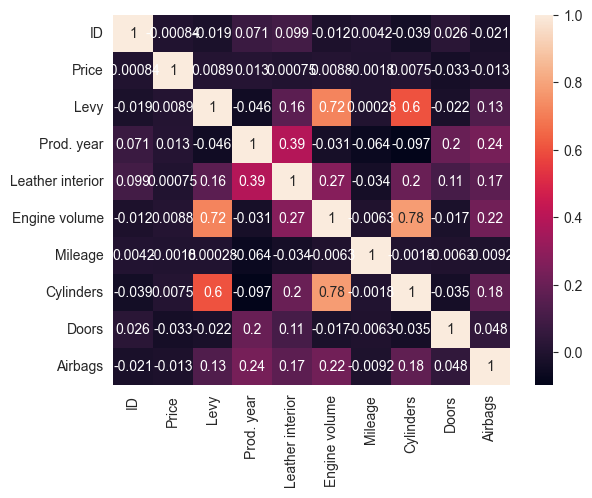

In [14]:
##remove ID
df_initial=df_initial.drop('ID',axis=1)
sns.heatmap(df_Initial_BackUp.corr(),annot=True)

In [15]:
df_Initial_BackUp.corr()['Price'].sort_values()

C:\Users\87066\AppData\Local\Temp\ipykernel_16208\4292674063.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_Initial_BackUp.corr()['Price'].sort_values()


Doors              -0.033116
Airbags            -0.012824
Mileage            -0.001758
ID                 -0.000844
Leather interior    0.000754
Cylinders           0.007518
Engine volume       0.008753
Levy                0.008904
Prod. year          0.012982
Price               1.000000
Name: Price, dtype: float64

In [16]:
df_highestPrice=df_initial.sort_values(by=['Price'], ascending=False)[:100]
df_lowestPrice=df_initial.sort_values(by=['Price'], ascending=True)[:100]
df_lowestPrice

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
7815,1,578.14,OPEL,Astra,1999,Sedan,1,Petrol,1.6,122231,4.0,Manual,Front,4,Left wheel,Silver,4
16992,1,1202.00,CHEVROLET,Lacetti,2006,Hatchback,0,Petrol,1.6,200000,4.0,Manual,Front,4,Left wheel,Black,2
13419,3,503.00,TOYOTA,Prius C,2012,Hatchback,1,Petrol,1.5,172800,4.0,Automatic,Front,4,Left wheel,Grey,12
17596,3,867.21,HYUNDAI,Sonata,2011,Sedan,1,Petrol,2.4,106422,4.0,Tiptronic,Front,4,Left wheel,White,6
7276,3,650.41,MERCEDES-BENZ,G 55 AMG,2020,Jeep,1,LPG,1.8,1212,12.0,Manual,4x4,5,Left wheel,Purple,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11988,30,542.01,TOYOTA,Prius,2007,Hatchback,0,LPG,1.5,198000,4.0,Tiptronic,Front,4,Left wheel,White,4
5499,30,469.74,HONDA,FIT,2004,Hatchback,0,Petrol,1.3,155000,4.0,Variator,Front,4,Right-hand drive,Silver,4
2296,30,469.74,HONDA,FIT,2007,Hatchback,0,Petrol,1.3,0,4.0,Automatic,Front,4,Right-hand drive,Silver,4
12824,30,542.01,NISSAN,Note,2005,Hatchback,1,Petrol,1.5,138000,4.0,Automatic,Front,4,Right-hand drive,Grey,4


In [17]:
df_highestPrice

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
16983,26307500,614.28,OPEL,Combo,1999,Goods wagon,0,Diesel,1.7,99999,4.0,Manual,Front,2,Left wheel,Blue,0
8541,872946,2067.00,LAMBORGHINI,Urus,2019,Universal,1,Petrol,4.0,2531,8.0,Tiptronic,4x4,4,Left wheel,Black,0
1225,627220,2276.43,MERCEDES-BENZ,G 65 AMG 63AMG,2020,Jeep,1,Petrol,6.3,0,8.0,Tiptronic,4x4,4,Left wheel,Black,12
5008,308906,1694.00,PORSCHE,911,2016,Coupe,1,Petrol,4.0,8690,6.0,Automatic,Rear,2,Left wheel,Black,12
14839,297930,1084.01,LAND ROVER,Range Rover Vogue,2019,Jeep,1,Diesel,3.0,4500,8.0,Tiptronic,4x4,4,Left wheel,Black,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14952,103491,1084.01,PORSCHE,Cayenne,2013,Jeep,1,Diesel,3.0,89161,6.0,Tiptronic,4x4,4,Left wheel,Black,12
10238,103491,903.35,BMW,X5,2018,Jeep,1,Diesel,2.5,59364,6.0,Tiptronic,4x4,4,Left wheel,Blue,12
11131,103491,1662.16,TOYOTA,Land Cruiser,2015,Jeep,0,Diesel,4.6,93000,8.0,Manual,4x4,4,Left wheel,White,0
8910,103491,1104.00,BMW,640 M,2015,Sedan,1,Petrol,3.0,45916,6.0,Tiptronic,4x4,4,Left wheel,White,12


In [18]:
df_initial[df_initial['Model']=='Combo'] ### 36 combo car

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
592,6429,1438.00,OPEL,Combo,2003,Goods wagon,0,Diesel,1.7,171339,4.0,Manual,Front,2,Left wheel,White,2
1309,5331,614.28,OPEL,Combo,2003,Goods wagon,0,Diesel,1.7,111111,4.0,Manual,Front,2,Left wheel,White,2
1565,5959,1438.00,OPEL,Combo,2003,Goods wagon,0,Diesel,1.7,235000,4.0,Manual,Rear,2,Left wheel,Blue,2
1730,5645,1440.00,OPEL,Combo,2002,Goods wagon,0,Diesel,1.7,167000,4.0,Manual,Front,4,Left wheel,White,1
2884,10976,578.14,OPEL,Combo,2008,Sedan,0,CNG,1.6,205000,4.0,Manual,Front,4,Left wheel,Silver,4
3741,9095,1438.00,OPEL,Combo,2003,Goods wagon,0,Diesel,1.7,16500,4.0,Manual,Front,4,Left wheel,Red,2
4565,9408,490.00,OPEL,Combo,2011,Goods wagon,0,Diesel,1.3,95000,4.0,Manual,Front,4,Left wheel,White,4
4736,7840,614.28,OPEL,Combo,2004,Goods wagon,0,Diesel,1.7,20000,4.0,Manual,Front,2,Left wheel,Blue,0
5199,9408,1438.00,OPEL,Combo,2003,Goods wagon,0,Diesel,1.7,152000,4.0,Manual,Front,4,Left wheel,Grey,2
5798,8154,505.87,OPEL,Combo,2007,Goods wagon,0,Petrol,1.4,260000,4.0,Manual,Front,2,Left wheel,White,1


In [19]:
df_initial['Model'].value_counts()

Prius                    1083
Sonata                   1079
Camry                     938
Elantra                   922
E 350                     542
                         ... 
Feroza                      1
C-MAX C-MAX                 1
X1 4X4                      1
Land Cruiser Prado RX       1
Prius C aqua                1
Name: Model, Length: 1590, dtype: int64

The mean value for engine value is about 2.3, and we can see that 80% of expensive car has high engine value, only 6% of cheap car has high engine value

In [20]:
def getMeanValue(columnName):
    meanValue=df_initial[columnName].mean()
    print("The mean {} is {}, number of expensive cars which above mean engine: {}, cheap car: {}".format(columnName,meanValue,
    len(df_highestPrice.loc[df_highestPrice[columnName]>=meanValue]),
    len(df_lowestPrice.loc[df_lowestPrice[columnName]>=meanValue])))


In [21]:
getMeanValue("Levy")
getMeanValue("Engine volume")
getMeanValue("Mileage")
getMeanValue("Doors")

The mean Levy is 882.4714778811665, number of expensive cars which above mean engine: 88, cheap car: 7
The mean Engine volume is 2.307989811301139, number of expensive cars which above mean engine: 80, cheap car: 6
The mean Mileage is 1532235.68768519, number of expensive cars which above mean engine: 0, cheap car: 1
The mean Doors is 3.925872017466341, number of expensive cars which above mean engine: 90, cheap car: 98


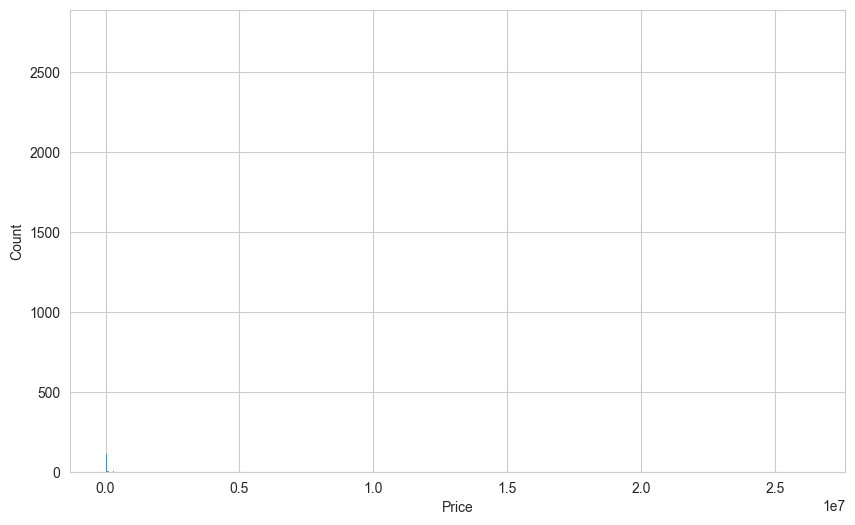

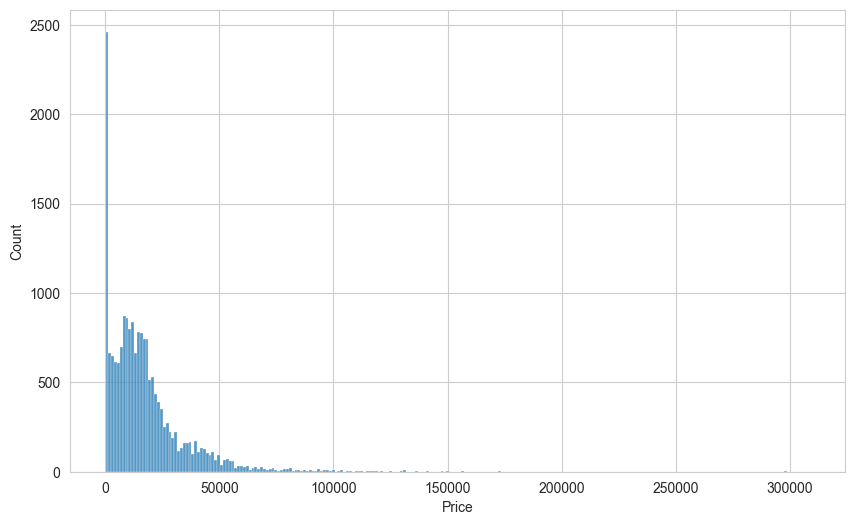

(18878, 17)


In [22]:
plt.figure(figsize=(10,6))
sns.histplot(data=df_initial['Price'])
plt.show()


idx=df_initial[df_initial['Price']>5_000_00].index
df_initial.drop(idx,axis=0,inplace=True)

idx=df_initial[df_initial['Price']<100].index
df_initial.drop(idx,axis=0,inplace=True)

plt.figure(figsize=(10,6))
sns.histplot(data=df_initial['Price'])
plt.show()

print(df_initial.shape)

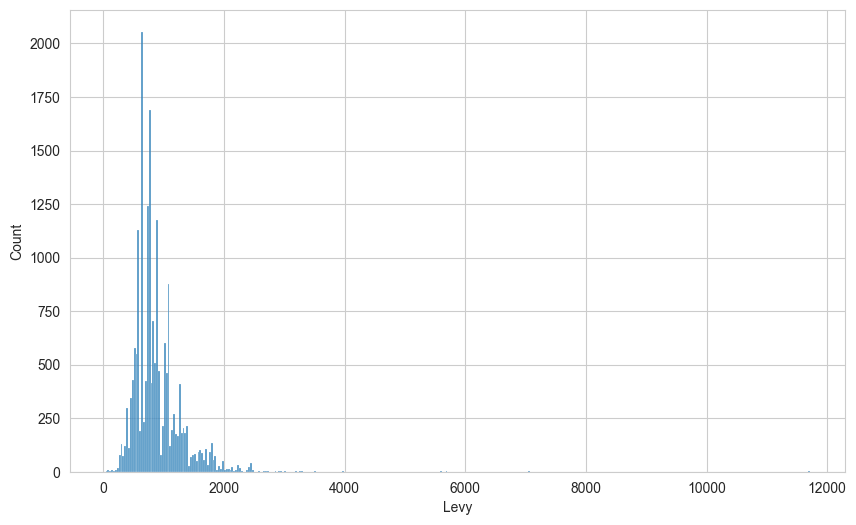

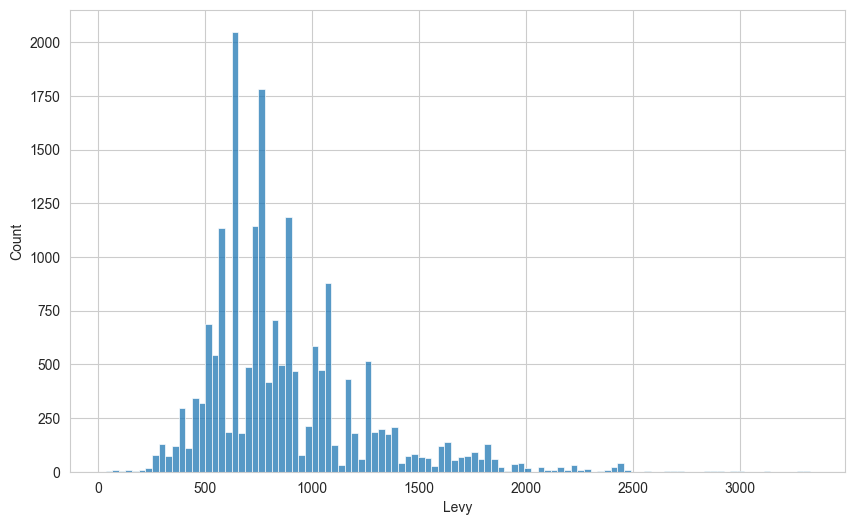

(18846, 17)


In [23]:
plt.figure(figsize=(10,6))
sns.histplot(df_initial['Levy'])
plt.show()


idx=df_initial[df_initial['Levy']>3500].index
df_initial.drop(idx,axis=0,inplace=True)

plt.figure(figsize=(10,6))
sns.histplot(df_initial['Levy'])
plt.show()
print(df_initial.shape)

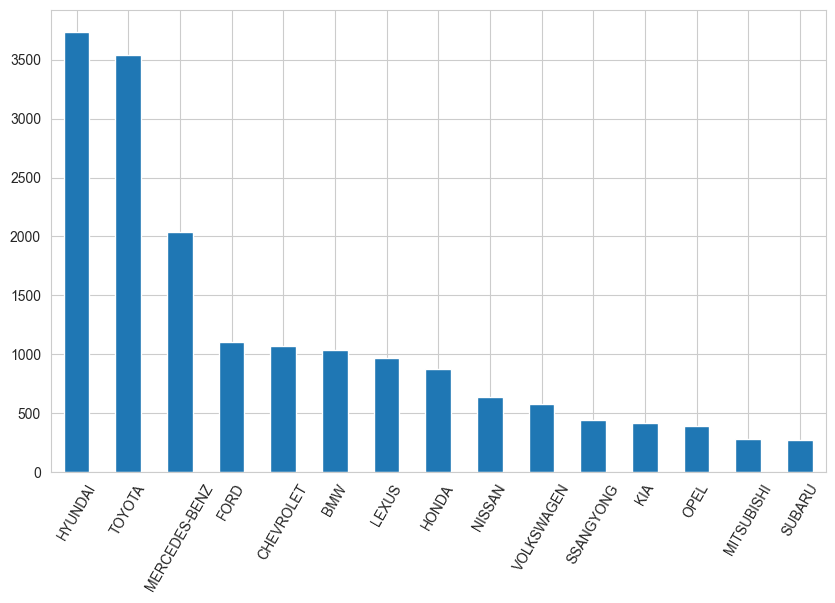

In [24]:
plt.figure(figsize=(10,6))
df_initial['Manufacturer'].value_counts()[:15].plot(kind='bar')
plt.xticks(rotation=60)
plt.show()

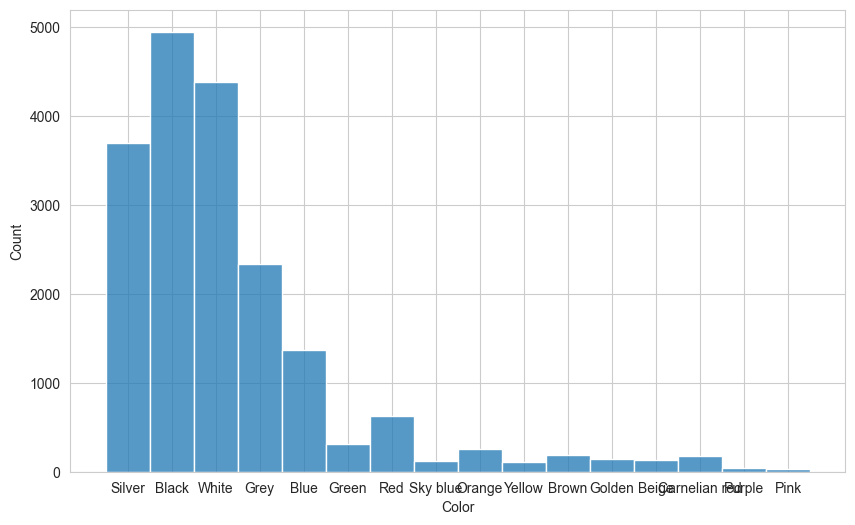

In [25]:
plt.figure(figsize=(10,6))
sns.histplot(data=df_initial['Color'])
plt.show()

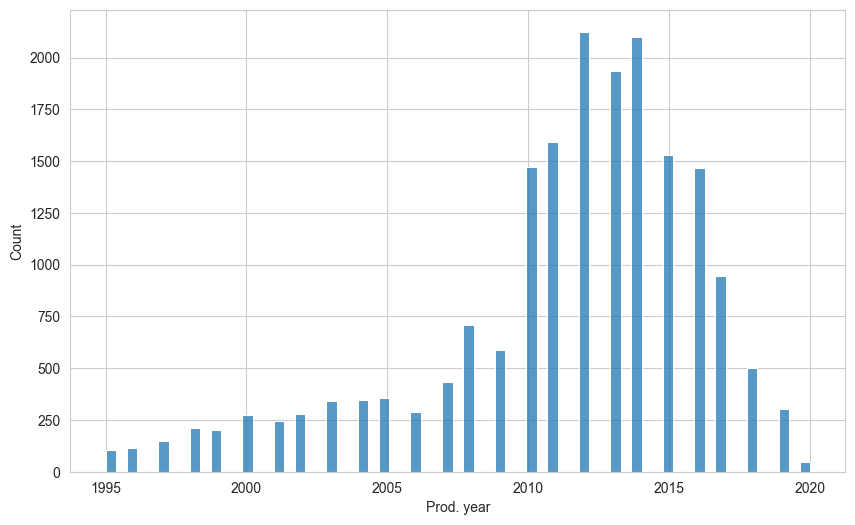

(18657, 17)


In [26]:
idx=df_initial[df_initial['Prod. year']<1995].index
df_initial.drop(idx,axis=0,inplace=True)

plt.figure(figsize=(10,6))
sns.histplot(df_initial['Prod. year'])
plt.show()
print(df_initial.shape)

D:\app\anaconda\envs\machineLearning\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\app\anaconda\envs\machineLearning\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 144 (\x90) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\app\anaconda\envs\machineLearning\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 155 (\x9b) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\app\anaconda\envs\machineLearning\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\app\anaconda\envs\machineLearning\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 157 (\x9d) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\app\anaconda\envs\machineLearning\lib\site-packages\IPython\core\py

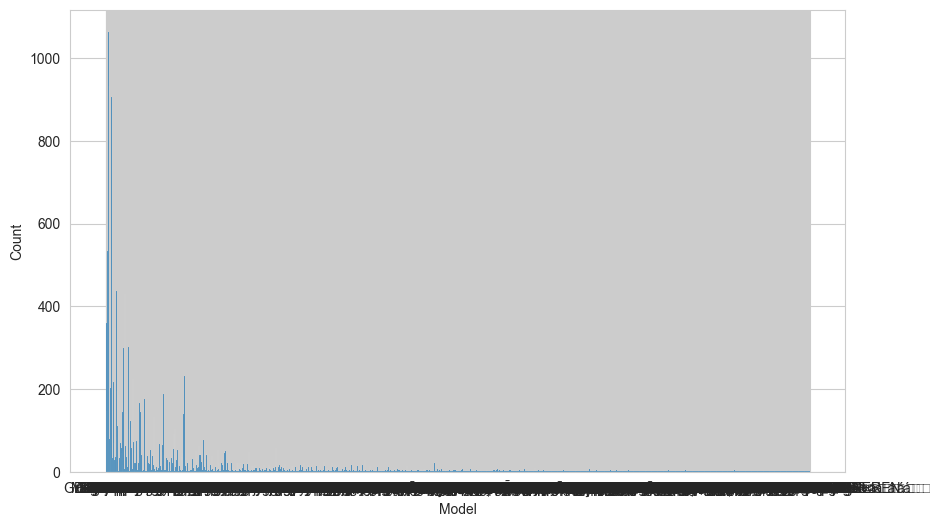

(18657, 17)


In [27]:
plt.figure(figsize=(10,6))
sns.histplot(df_initial['Model'])
plt.show()
print(df_initial.shape)

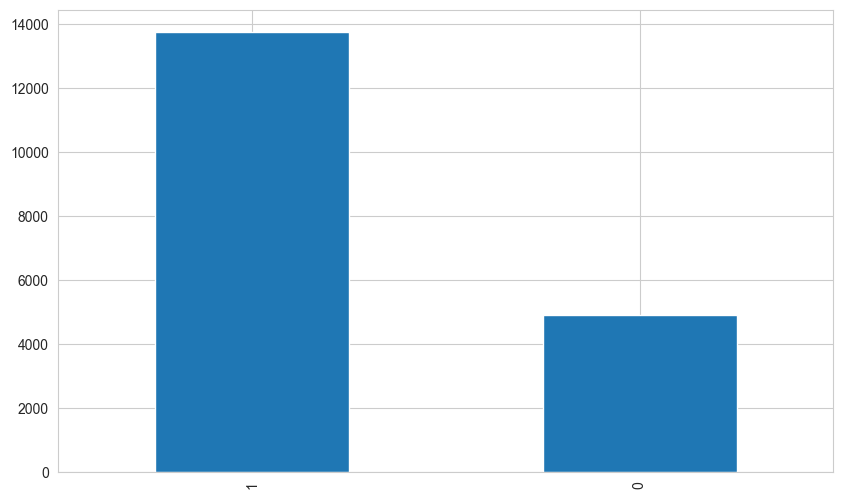

In [28]:
plt.figure(figsize=(10,6))
df_initial['Leather interior'].value_counts().plot(kind='bar')
plt.show()

   Leather interior         Price
0                 0  14191.222222
1                 1  18748.101076


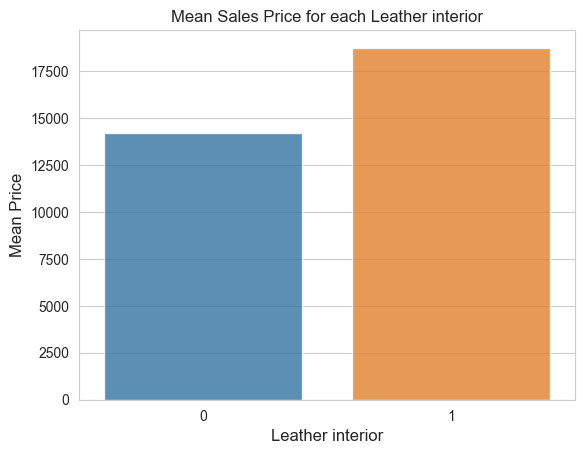

In [29]:
mean_price_interior = df_initial[['Leather interior', 'Price']].groupby('Leather interior', as_index = False).mean()
print(mean_price_interior)
sns.barplot(x=mean_price_interior['Leather interior'], y=mean_price_interior['Price'], alpha = 0.8)
plt.title('Mean Sales Price for each Leather interior')
plt.ylabel('Mean Price', fontsize = 12)
plt.xlabel('Leather interior', fontsize = 12)
plt.show()

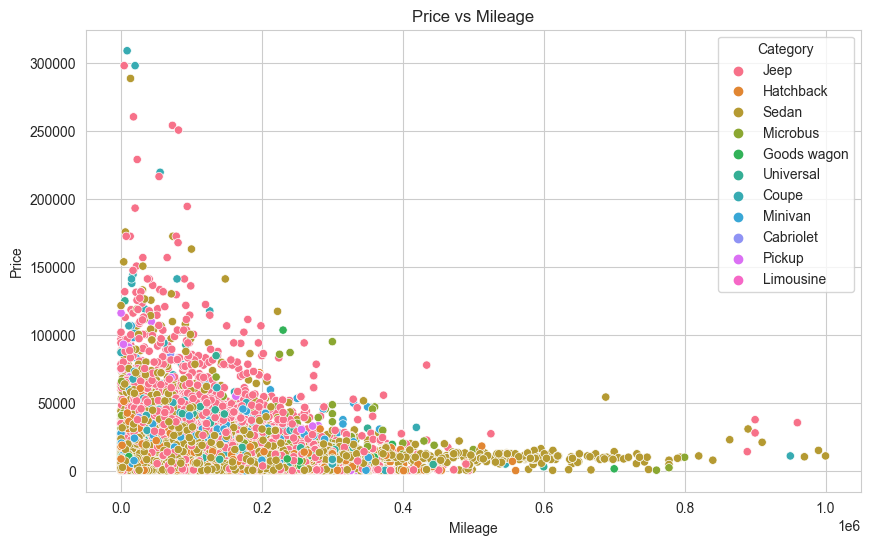

(18592, 17)


In [30]:
idx=df_initial[df_initial['Mileage']>10_000_00].index
df_initial.drop(idx,axis=0,inplace=True)

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_initial,x='Mileage',y='Price',hue='Category')
plt.title("Price vs Mileage")
plt.show()
print(df_initial.shape)

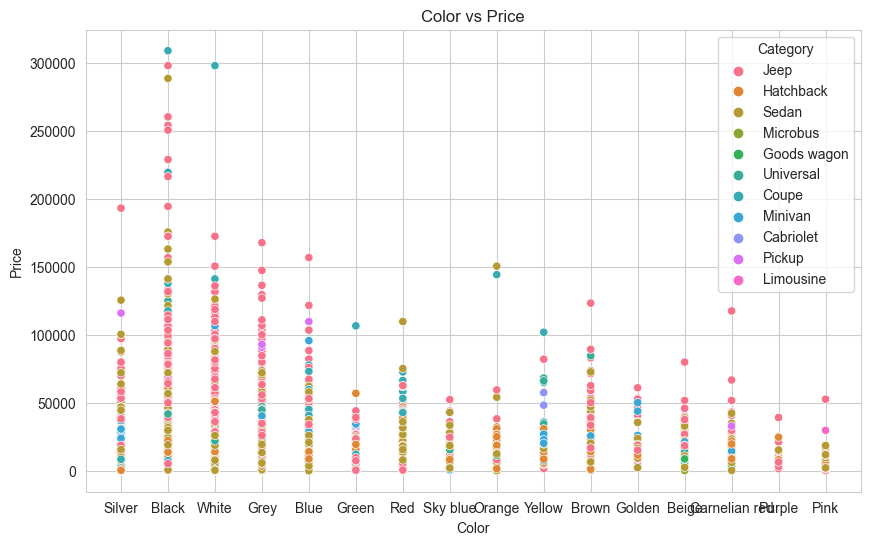

In [31]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_initial,x='Color',y='Price',hue='Category')
plt.title("Color vs Price")
plt.show()

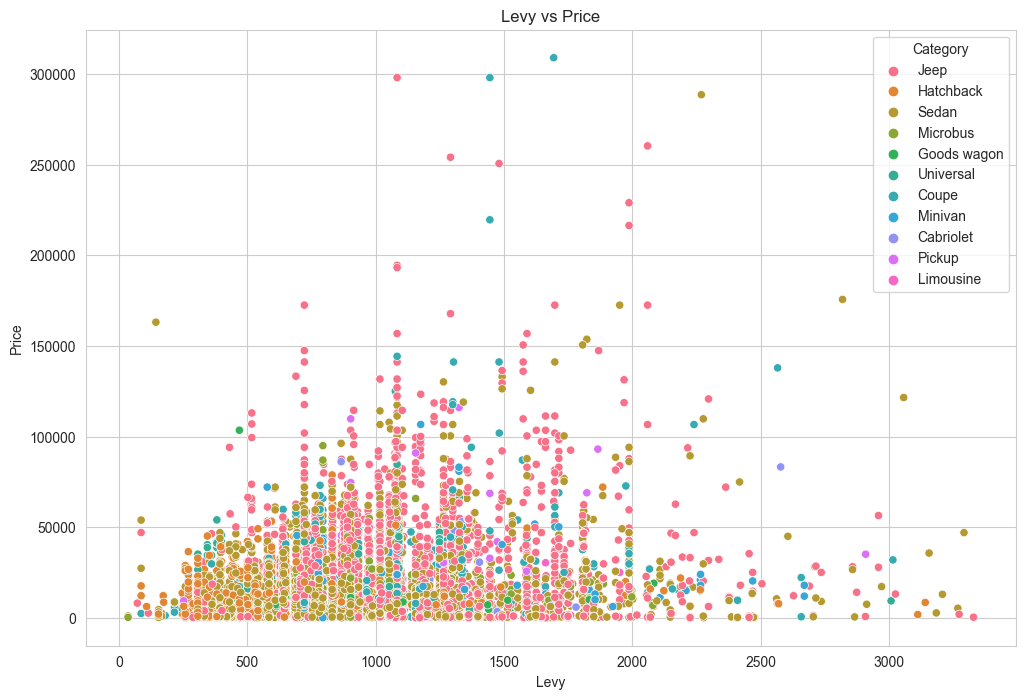

In [32]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df_initial,x='Levy',y='Price',hue='Category')
plt.title("Levy vs Price")
plt.show()

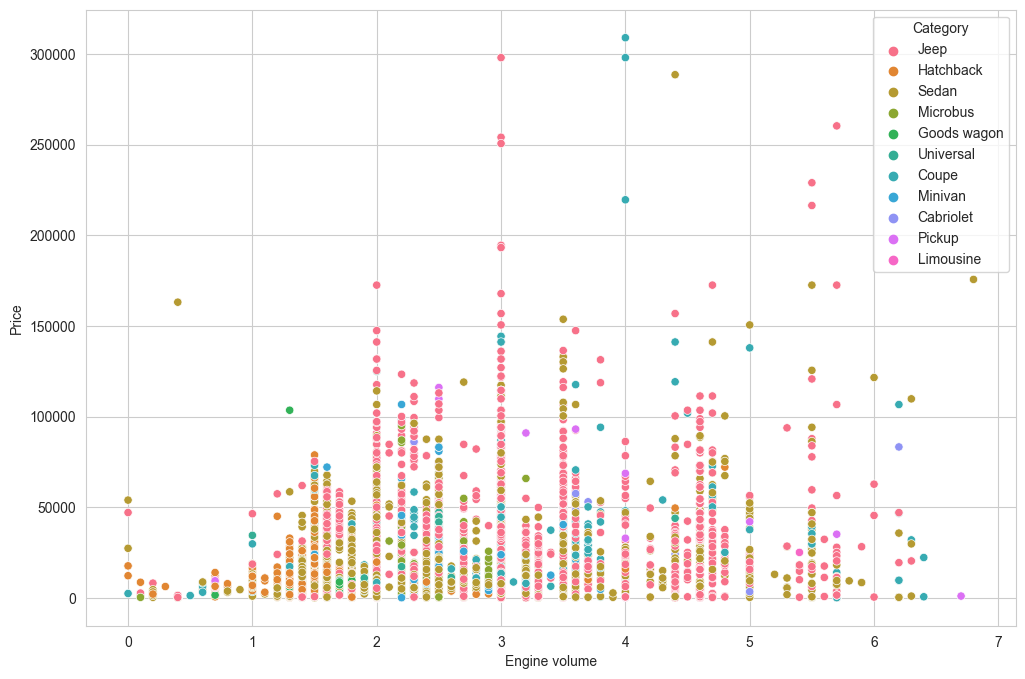

In [33]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df_initial,x='Engine volume',y='Price',hue='Category')
plt.show()

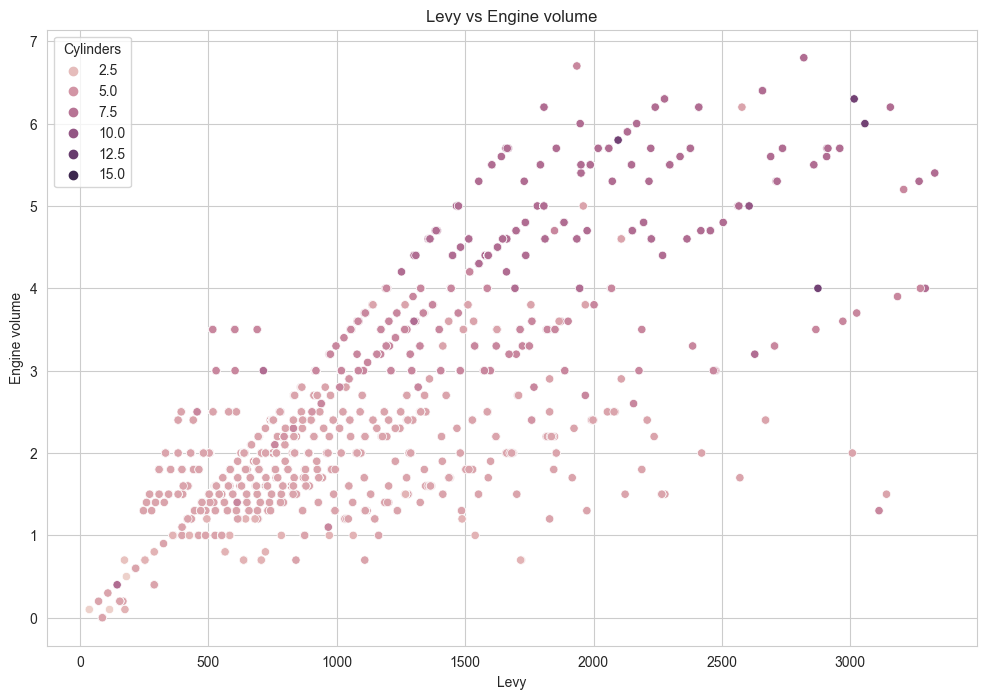

In [34]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df_initial,x='Levy',y='Engine volume',hue='Cylinders')
plt.title("Levy vs Engine volume")
plt.show()

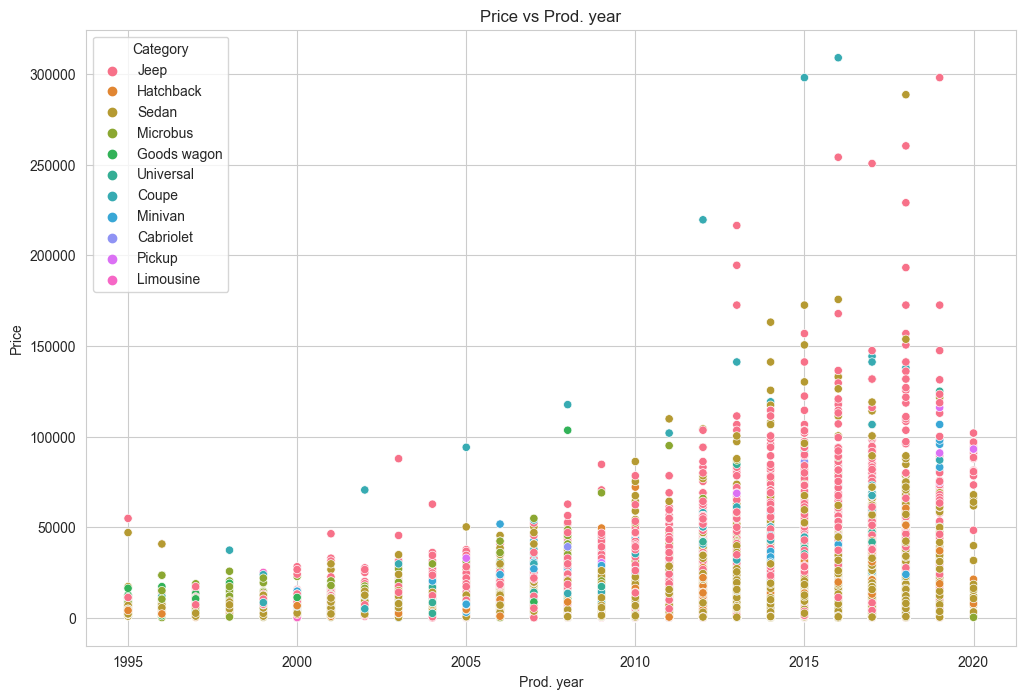

In [35]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df_initial,x='Prod. year',y='Price',hue='Category')
plt.title("Price vs Prod. year")
plt.show()

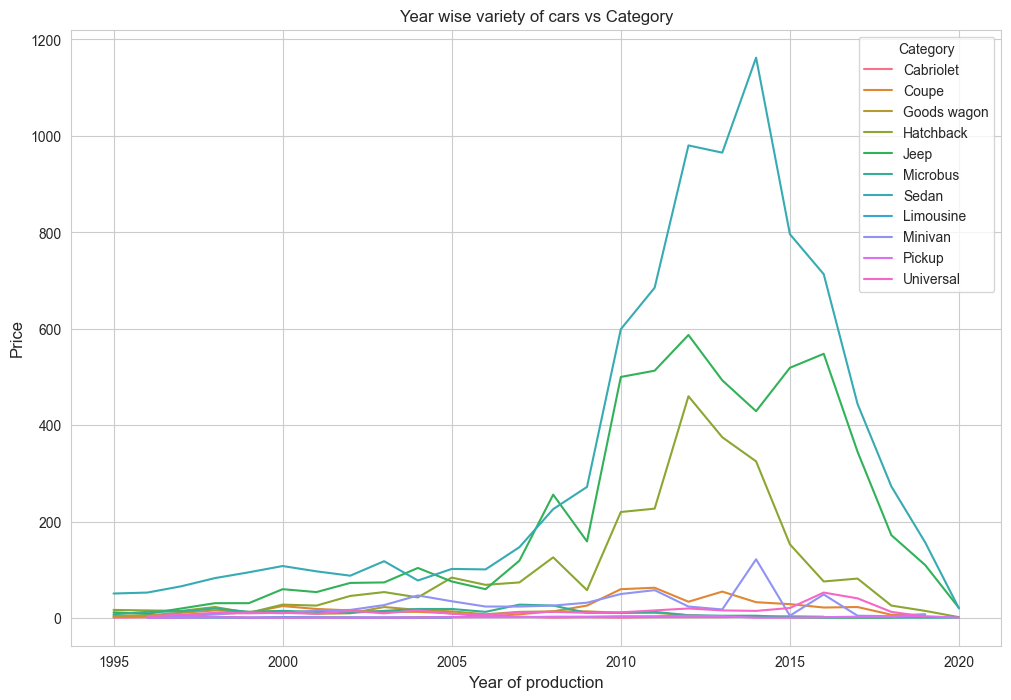

In [36]:
plt.figure(figsize=(12,8))
df1 = df_initial[['Prod. year','Category', 'Price']].groupby(by= ['Prod. year','Category'], as_index=True).count().reset_index()
plot = sns.lineplot(x = 'Prod. year', y = 'Price',  data = df1, hue = 'Category')
plt.title(f'Year wise variety of cars vs Category')
plt.xlabel('Year of production', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

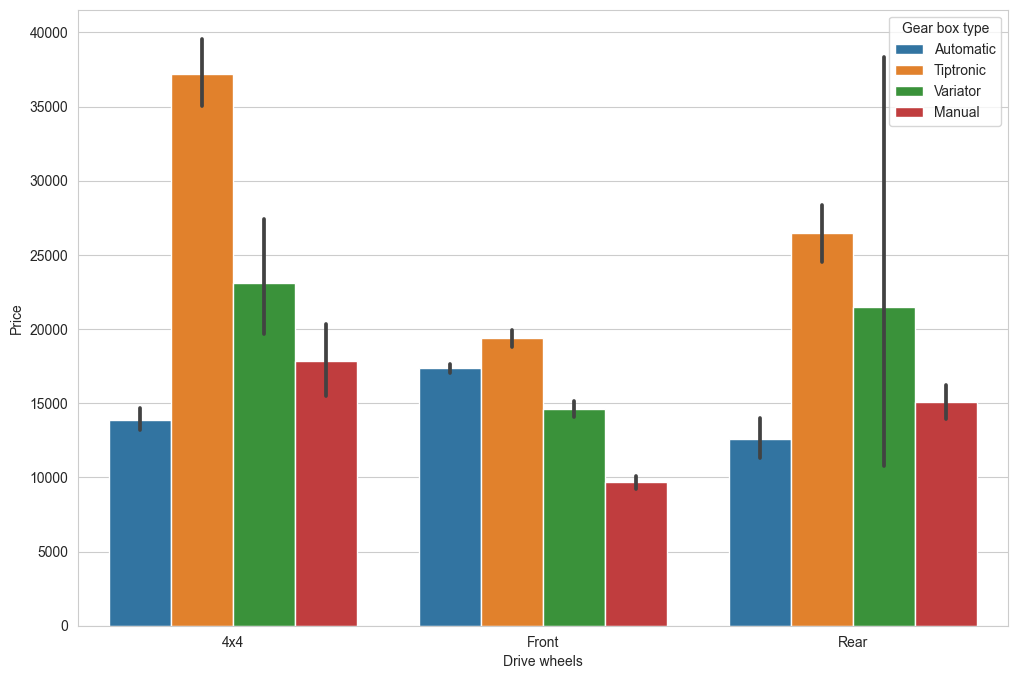

In [37]:
plt.figure(figsize=(12,8))
sns.barplot(data=df_initial,x='Drive wheels',y='Price',hue='Gear box type')
plt.show()

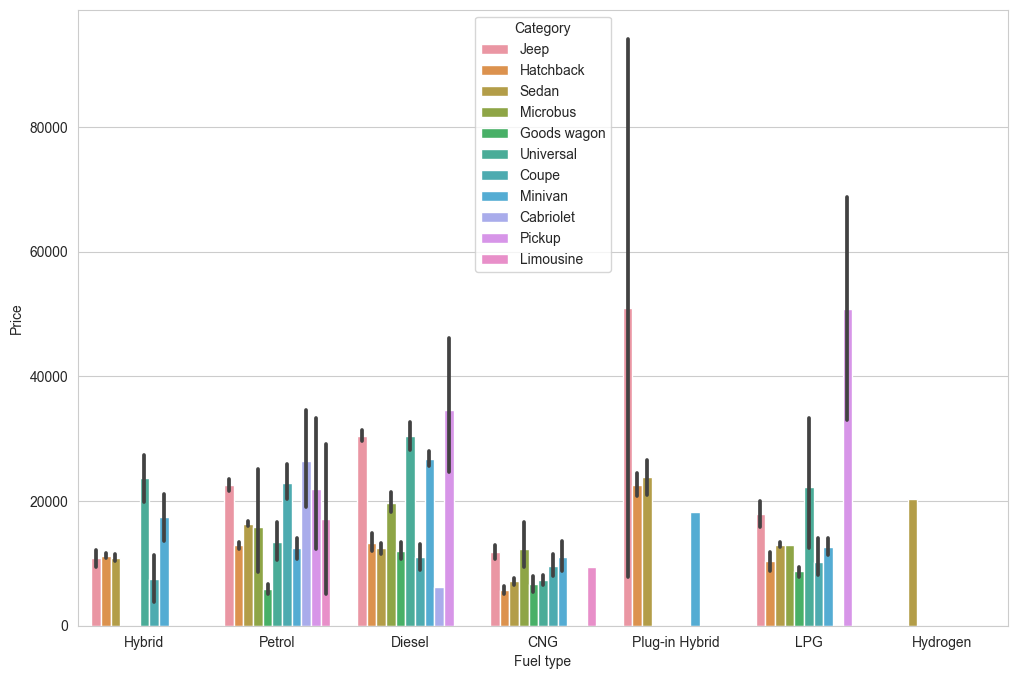

In [38]:
plt.figure(figsize=(12,8))
sns.barplot(data=df_initial,x='Fuel type',y='Price',hue='Category')
plt.show()

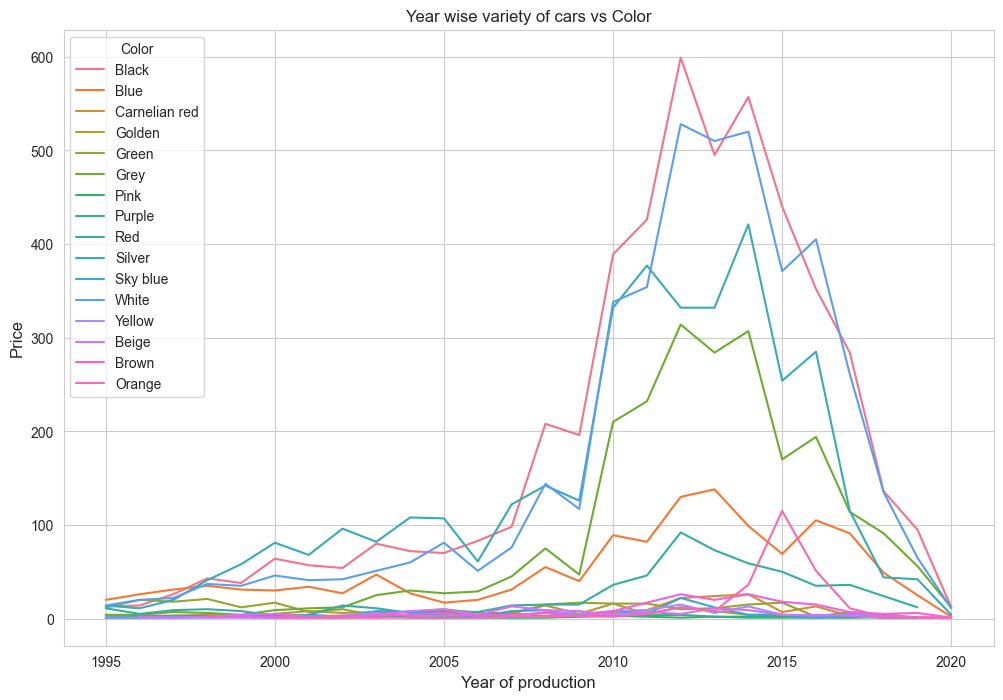

In [39]:
plt.figure(figsize=(12,8))
df1 = df_initial[['Prod. year','Color', 'Price']].groupby(by= ['Prod. year','Color'], as_index=True).count().reset_index()
plot = sns.lineplot(x = 'Prod. year', y = 'Price',  data = df1, hue = 'Color')
plt.title(f'Year wise variety of cars vs Color')
plt.xlabel('Year of production', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

C:\Users\87066\AppData\Local\Temp\ipykernel_16208\2146915192.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_initial.corr(),annot=True)
C:\Users\87066\AppData\Local\Temp\ipykernel_16208\2146915192.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_initial.corr()['Price'].sort_values()


Mileage            -0.214916
Airbags            -0.031620
Doors               0.009978
Cylinders           0.101794
Leather interior    0.107822
Engine volume       0.125094
Levy                0.142826
Prod. year          0.297967
Price               1.000000
Name: Price, dtype: float64

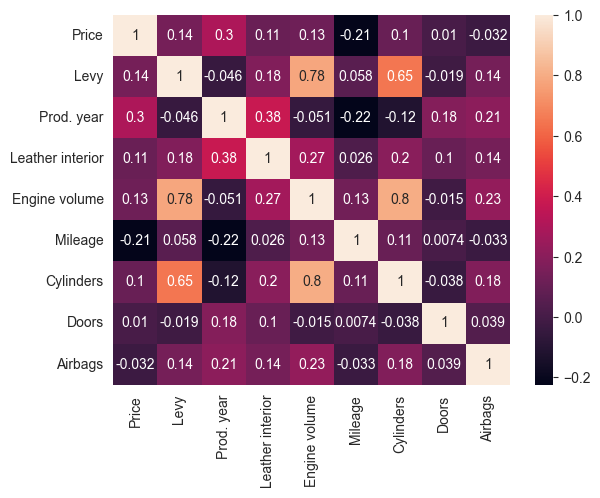

In [40]:
sns.heatmap(df_initial.corr(),annot=True)
df_initial.corr()['Price'].sort_values()

# Encoding

In [41]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder

# encoder = OneHotEncoder(sparse=False)
# # df_initial['Manufacturer'].values
# Manufacturer_one = encoder.fit_transform([df_initial['Manufacturer'].values])
# Model_one = encoder.fit_transform(df_initial['Model'].values)
# Category_one = encoder.fit_transform(df_initial['Category'].values)
# Fuel_type_one = encoder.fit_transform(df_initial['Fuel type'].values)
# Gear_box_type_one = encoder.fit_transform(df_initial['Gear box type'].values)
# Wheel_one  = encoder.fit_transform(df_initial['Wheel'].values)
# Drive_wheels_one = encoder.fit_transform(df_initial['Drive wheels'].values)
# Color_one = encoder.fit_transform(df_initial['Color'].values)

encoder = OneHotEncoder(sparse=False)
# df_initial['Manufacturer'].values
Manufacturer_onehot = encoder.fit_transform([[x] for x in df_initial['Manufacturer'].values])
Model_onehot = encoder.fit_transform([[x] for x in df_initial['Model'].values])
Category_onehot = encoder.fit_transform([[x] for x in df_initial['Category'].values])
Fuel_type_onehot = encoder.fit_transform([[x] for x in df_initial['Fuel type'].values])
Gear_box_onehot = encoder.fit_transform([[x] for x in df_initial['Gear box type'].values])
Wheel_onehot = encoder.fit_transform([[x] for x in df_initial['Wheel'].values])
Drive_wheels_onehot = encoder.fit_transform([[x] for x in df_initial['Drive wheels'].values])
Color_onehot = encoder.fit_transform([[x] for x in df_initial['Color'].values])
Doors_onehot=encoder.fit_transform([[x] for x in df_initial['Doors'].values])



# Color_onehot
# theRawList=[[x] for x in df_initial['Manufacturer'].values]
# theOneList=[[r[col] for r in Color_onehot] for col in range(len(Color_onehot[0]))]
# theOneList
# print(len(theOneList))
# print([len(a) for a in theOneList][0])
#
# print(len(Color_onehot))
# print([len(a) for a in Color_onehot][0])
#
# print(len(theRawList))
# print([len(a) for a in theRawList][0])

D:\app\anaconda\envs\machineLearning\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
D:\app\anaconda\envs\machineLearning\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
D:\app\anaconda\envs\machineLearning\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
D:\app\anaconda\envs\machineLearning\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_out

In [42]:
def addColumnToDataFrame(name,theArray,theDataFrame=df_initial):
    thelist=[[r[col] for r in theArray] for col in range(len(theArray[0]))]
    print(f"{name} column: {len(thelist)}")
    print(f"{name} row: {[len(a) for a in Color_onehot][0]}")
    numOfColumn=0
    for column in thelist:
        theDataFrame[name+str(numOfColumn)]=column
        numOfColumn+=1
    return theDataFrame

In [43]:
addColumnToDataFrame('Manufacturer',Manufacturer_onehot)
# addColumnToDataFrame('Model',Model_onehot)
addColumnToDataFrame('Category',Category_onehot)
addColumnToDataFrame('Fuel type',Fuel_type_onehot)
addColumnToDataFrame('Gear box type',Gear_box_onehot)
addColumnToDataFrame('Wheel',Wheel_onehot)
addColumnToDataFrame('Drive wheels',Drive_wheels_onehot)
addColumnToDataFrame('Color',Color_onehot)
addColumnToDataFrame('Doors',Doors_onehot)

Manufacturer column: 61
Manufacturer row: 16
Category column: 11
Category row: 16
Fuel type column: 7
Fuel type row: 16
Gear box type column: 4
Gear box type row: 16
Wheel column: 2
Wheel row: 16
Drive wheels column: 3
Drive wheels row: 16
Color column: 16
Color row: 16
Doors column: 3
Doors row: 16


C:\Users\87066\AppData\Local\Temp\ipykernel_16208\2732938704.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  theDataFrame[name+str(numOfColumn)]=column
C:\Users\87066\AppData\Local\Temp\ipykernel_16208\2732938704.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  theDataFrame[name+str(numOfColumn)]=column
C:\Users\87066\AppData\Local\Temp\ipykernel_16208\2732938704.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,...,Color9,Color10,Color11,Color12,Color13,Color14,Color15,Doors0,Doors1,Doors2
0,13328,1399.00,LEXUS,RX 450,2010,Jeep,1,Hybrid,3.5,186005,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,16621,1018.00,CHEVROLET,Equinox,2011,Jeep,0,Petrol,3.0,192000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,8467,469.74,HONDA,FIT,2006,Hatchback,0,Petrol,1.3,200000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3607,862.00,FORD,Escape,2011,Jeep,1,Hybrid,2.5,168966,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,11726,446.00,HONDA,FIT,2014,Hatchback,1,Petrol,1.3,91901,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,722.68,MERCEDES-BENZ,CLK 200,1999,Coupe,1,CNG,2.0,300000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
19233,15681,831.00,HYUNDAI,Sonata,2011,Sedan,1,Petrol,2.4,161600,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19234,26108,836.00,HYUNDAI,Tucson,2010,Jeep,1,Diesel,2.0,116365,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19235,5331,1288.00,CHEVROLET,Captiva,2007,Jeep,1,Diesel,2.0,51258,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [44]:
df_initial

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,...,Color9,Color10,Color11,Color12,Color13,Color14,Color15,Doors0,Doors1,Doors2
0,13328,1399.00,LEXUS,RX 450,2010,Jeep,1,Hybrid,3.5,186005,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,16621,1018.00,CHEVROLET,Equinox,2011,Jeep,0,Petrol,3.0,192000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,8467,469.74,HONDA,FIT,2006,Hatchback,0,Petrol,1.3,200000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3607,862.00,FORD,Escape,2011,Jeep,1,Hybrid,2.5,168966,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,11726,446.00,HONDA,FIT,2014,Hatchback,1,Petrol,1.3,91901,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,722.68,MERCEDES-BENZ,CLK 200,1999,Coupe,1,CNG,2.0,300000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
19233,15681,831.00,HYUNDAI,Sonata,2011,Sedan,1,Petrol,2.4,161600,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19234,26108,836.00,HYUNDAI,Tucson,2010,Jeep,1,Diesel,2.0,116365,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19235,5331,1288.00,CHEVROLET,Captiva,2007,Jeep,1,Diesel,2.0,51258,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [45]:
df_initial.shape

(18592, 124)

In [46]:
df_initial.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,...,Color9,Color10,Color11,Color12,Color13,Color14,Color15,Doors0,Doors1,Doors2
0,13328,1399.00,LEXUS,RX 450,2010,Jeep,1,Hybrid,3.5,186005,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,16621,1018.00,CHEVROLET,Equinox,2011,Jeep,0,Petrol,3.0,192000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,8467,469.74,HONDA,FIT,2006,Hatchback,0,Petrol,1.3,200000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3607,862.00,FORD,Escape,2011,Jeep,1,Hybrid,2.5,168966,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,11726,446.00,HONDA,FIT,2014,Hatchback,1,Petrol,1.3,91901,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [47]:
df_initial['Manufacturer']

0                LEXUS
1            CHEVROLET
2                HONDA
3                 FORD
4                HONDA
             ...      
19232    MERCEDES-BENZ
19233          HYUNDAI
19234          HYUNDAI
19235        CHEVROLET
19236          HYUNDAI
Name: Manufacturer, Length: 18592, dtype: object

In [48]:
df_initial.corr()['Price'].sort_values()

C:\Users\87066\AppData\Local\Temp\ipykernel_16208\3897320304.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_initial.corr()['Price'].sort_values()


Mileage          -0.214916
Fuel type2       -0.167298
Category9        -0.151206
Category3        -0.120372
Wheel1           -0.116658
                    ...   
Fuel type1        0.193400
Gear box type2    0.211403
Category4         0.219144
Prod. year        0.297967
Price             1.000000
Name: Price, Length: 116, dtype: float64

In [49]:
# df_initial['Manufacturer'] = Manufacturer_le.fit_transform(df_initial['Manufacturer'])
# df_initial['Model'] = Model_le.fit_transform(df_initial['Model'])
# df_initial['Category'] = Category_le.fit_transform(df_initial['Category'])
# df_initial['Fuel type'] = Fuel_type_le.fit_transform(df_initial['Fuel type'])
# df_initial['Gear box type'] = Gear_box_type_le.fit_transform(df_initial['Gear box type'])
# df_initial['Wheel'] = Wheel_le.fit_transform(df_initial['Wheel'])
# df_initial['Drive wheels'] = Drive_wheels_le.fit_transform(df_initial['Drive wheels'])
# df_initial['Color'] = Color_le.fit_transform(df_initial['Color'])

# Feature Selection

In [50]:
# df_featureSelected=df_initial[['Mileage','Wheel','Category','Levy','Cylinders','Leather interior','Engine volume','Prod. year']]
# df_featureSelected=df_initial[['Mileage','Leather interior','Engine volume','Prod. year']]
df_featureSelected=df_initial.drop(['Price','Manufacturer','Model','Category','Fuel type','Gear box type','Wheel','Drive wheels','Color','Doors'],axis=1)
# sns.heatmap(df_featureSelected.corr(),annot=True)
# df_initial.corr()['Price'].sort_values()

In [51]:
X = df_featureSelected.values
Y = df_initial['Price'].values

X

array([[1.3990e+03, 2.0100e+03, 1.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [1.0180e+03, 2.0110e+03, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [4.6974e+02, 2.0060e+03, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       ...,
       [8.3600e+02, 2.0100e+03, 1.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [1.2880e+03, 2.0070e+03, 1.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [7.5300e+02, 2.0120e+03, 1.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00]])

In [52]:
df_featureSelected

,Levy,Prod. year,Leather interior,Engine volume,Mileage,Cylinders,Airbags,Manufacturer0,Manufacturer1,Manufacturer2,...,Color9,Color10,Color11,Color12,Color13,Color14,Color15,Doors0,Doors1,Doors2
0,1399.00,2010,1,3.5,186005,6.0,12,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1018.00,2011,0,3.0,192000,6.0,8,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,469.74,2006,0,1.3,200000,4.0,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,862.00,2011,1,2.5,168966,4.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,446.00,2014,1,1.3,91901,4.0,4,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,722.68,1999,1,2.0,300000,4.0,5,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
19233,831.00,2011,1,2.4,161600,4.0,8,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19234,836.00,2010,1,2.0,116365,4.0,4,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19235,1288.00,2007,1,2.0,51258,4.0,4,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [53]:
### split data
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score ,mean_absolute_error, mean_squared_error,explained_variance_score
x_train , x_test , y_train , y_test = train_test_split(X,Y , test_size= 0.3 ,random_state=42)

In [54]:
# print(f"df_ini: {type(df_featureSelected.values)} y type: {type(df_initial['Price'].values)}")
# print(f"x: {type(x_train)}   y: {type(y_train)}")
# print(f"x shape: {x_train.shape} y shape: {y_train.shape}")
# print(f"x df_ini shape:{df_featureSelected.shape} y: {df_initial['Price'].shape}")
# print(df_featureSelected.info())
# print(df_initial.shape)
#
# from sklearn.svm import SVC
# svc = SVC(kernel="linear")
#
# from sklearn.model_selection import StratifiedKFold
# from sklearn.feature_selection import RFECV
# rfecv = RFECV(estimator=svc,          # 学习器
#               min_features_to_select=2, # 最小选择的特征数量
#               step=1,                 # 移除特征个数
#               cv=StratifiedKFold(2),  # 交叉验证次数
#               scoring='accuracy',     # 学习器的评价标准
#               verbose = 0,
#               n_jobs = 1
#               ).fit(df_featureSelected.values[5000:], df_initial['Price'].values[5000:])
# print("RFECV特征选择结果——————————————————————————————————————————————————")
# print("有效特征个数 : %d" % rfecv.n_features_)
# print("全部特征等级 : %s" % list(rfecv.ranking_))

# Modelling

In [55]:
### data normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test  = scaler.transform(x_test)

In [56]:
def calPerformance(y_true,y_pred):
    model_metrics_name=[mean_absolute_error, mean_squared_error, r2_score]
    tmp_list=[]
    for one in model_metrics_name:
        tmp_score=one(y_true,y_pred)
        tmp_list.append([round(tmp_score,3)])
    # print ['explained_variance_score','mean_absolute_error','mean_squared_error','r2_score']
    # print tmp_list
    row=["explained_variance_score","mean_absolute_error","mean_squared_error","r2_score"]

    # fig, ax =plt.subplots(1,1)
    # ax.axis('tight')
    # ax.axis('off')
    # ax.table(cellText=tmp_list,rowLabels=row,loc="center")

    # print(f"explained_variance_score  {tmp_list[0]}")
    print(f"mean_absolute_error  {tmp_list[0]}")
    print(f"mean_squared_error  {tmp_list[1]}")
    print(f"r2_score  {tmp_list[2]}")

In [57]:
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression, LogisticRegression


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

Linear

In [58]:
linear_regressor = LinearRegression()
linear_regressor.fit(x_train, y_train)

LinearRegression()

In [59]:
y_pred = linear_regressor.predict(x_test)
y_trainPredicted=linear_regressor.predict(x_train[-3000:])
LR = pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
LR

,y_test,y_pred
0,12544,6656.0
1,8781,5056.0
2,17876,11200.0
3,5331,-1920.0
4,18817,7872.0
...,...,...
5573,12231,18496.0
5574,549,7168.0
5575,29075,29120.0
5576,56450,34688.0


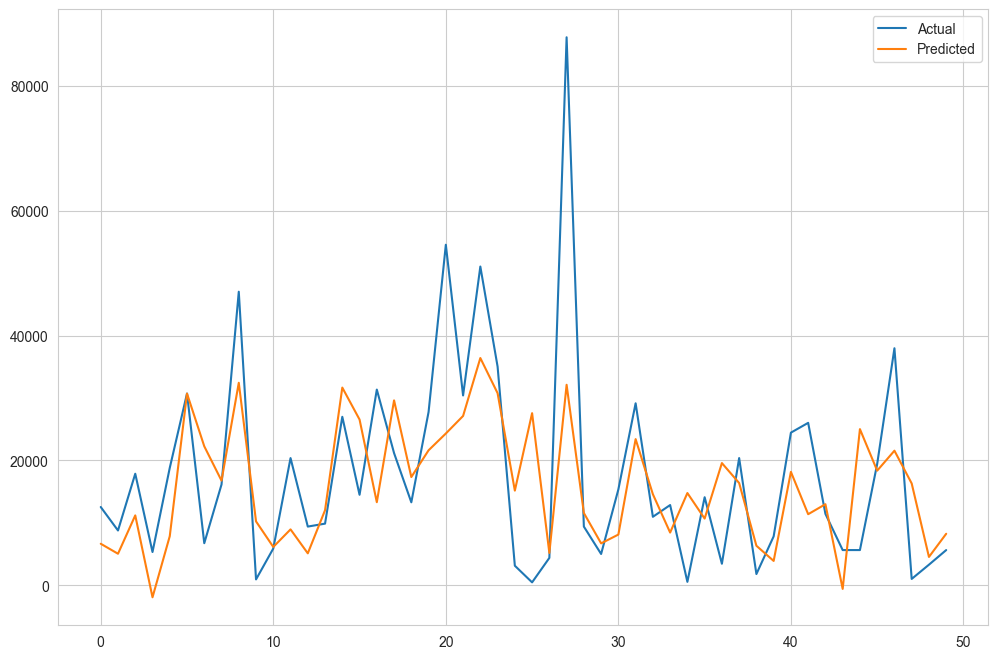

In [60]:
plt.figure(figsize=(12,8))
plt.plot(LR[:50])
plt.legend(['Actual' , 'Predicted'])

In [61]:
print(f"Linear model")
calPerformance(y_test,y_pred)

Linear model
mean_absolute_error  [16050194197198.758]
mean_squared_error  [7.423916934337128e+29]
r2_score  [-2.1665696869351088e+21]


In [62]:
from sklearn.model_selection import ShuffleSplit
from sklearn.naive_bayes import GaussianNB

print(f"Linear model for train data validation")
calPerformance(y_train[-3000:],y_trainPredicted)

Linear model for train data validation
mean_absolute_error  [9632.018]
mean_squared_error  [213805699.482]
r2_score  [0.337]


Knn

In [63]:
from sklearn.neighbors import KNeighborsRegressor
knn= KNeighborsRegressor()
knn.fit(x_train, y_train)

KNeighborsRegressor()

In [64]:
y_pred = knn.predict(x_test)
y_pred = knn.predict(x_test)
y_trainPredicted=knn.predict(x_train)
kn= pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
kn.head()

,y_test,y_pred
0,12544,7463.8
1,8781,5065.0
2,17876,18502.8
3,5331,6605.8
4,18817,1866.2


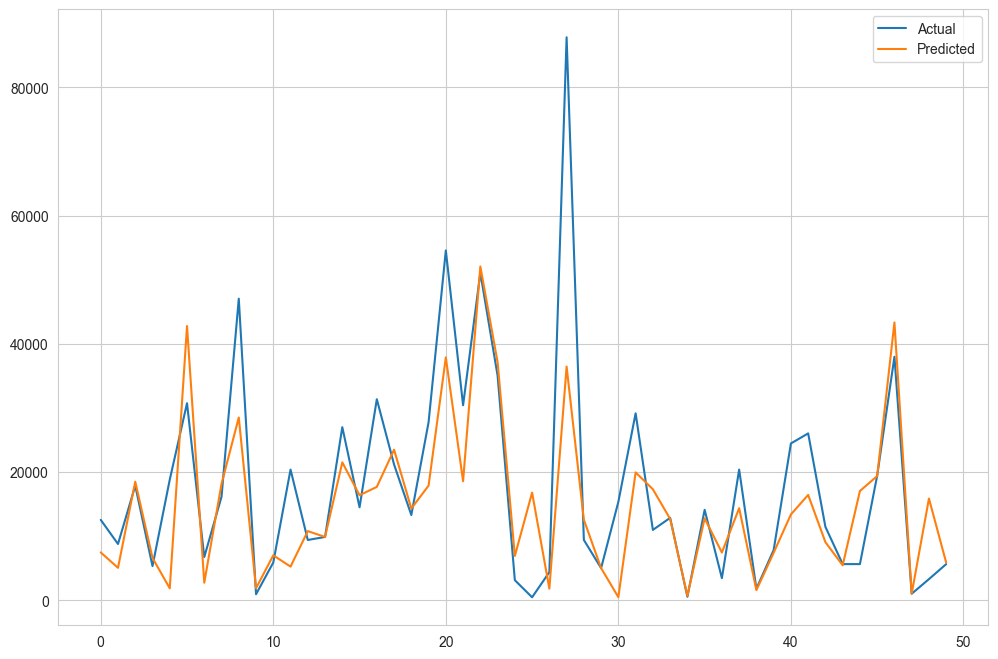

In [65]:
plt.figure(figsize=(12,8))
plt.plot(kn[:50])
plt.legend(['Actual' , 'Predicted'])

In [66]:
print(f"Knn model")
calPerformance(y_test,y_pred)

Knn model
mean_absolute_error  [6358.091]
mean_squared_error  [170624943.333]
r2_score  [0.502]


In [67]:
print(f"Knn model for train data validation")
calPerformance(y_train,y_trainPredicted)

Knn model for train data validation
mean_absolute_error  [4888.03]
mean_squared_error  [102617451.971]
r2_score  [0.693]


Random Forest

In [68]:
from sklearn.ensemble import RandomForestRegressor
Rf = RandomForestRegressor(n_estimators = 400,max_depth=15, max_features='log2',random_state=1)
Rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=15, max_features='log2', n_estimators=400,
                      random_state=1)

In [69]:
y_pred = Rf.predict(x_test)
y_pred = Rf.predict(x_test)

y_trainPredicted=Rf.predict(x_train)
rf= pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
rf.head()

,y_test,y_pred
0,12544,10569.133722
1,8781,10737.177067
2,17876,14273.926227
3,5331,7411.650628
4,18817,9539.075133


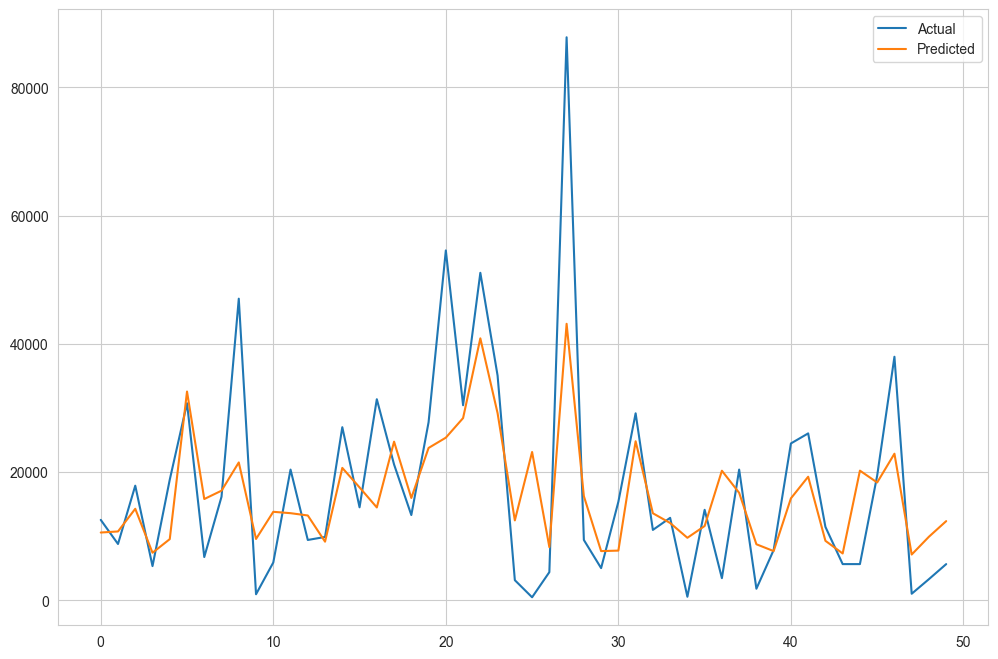

In [70]:
plt.figure(figsize=(12,8))
plt.plot(rf[:50])
plt.legend(['Actual' , 'Predicted'])

In [71]:
print(f"Random Forest model")
calPerformance(y_test,y_pred)

Random Forest model
mean_absolute_error  [7346.033]
mean_squared_error  [161488594.493]
r2_score  [0.529]


In [72]:
### for validation
print("Random Forest model for train data validation")
calPerformance(y_train,y_trainPredicted)

Random Forest model for train data validation
mean_absolute_error  [6245.557]
mean_squared_error  [97615232.529]
r2_score  [0.708]


XGBRegressor Model

In [88]:
from xgboost import XGBRegressor
xg = XGBRegressor(objective ='reg:linear',max_depth=3,n_estimators = 200)
xg.fit(x_train, y_train)

[23:14:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=200, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto', ...)

In [89]:
y_pred = xg.predict(x_test)
y_pred = xg.predict(x_test)
y_trainPredicted=xg.predict(x_train)
gx= pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
gx

,y_test,y_pred
0,12544,8826.127930
1,8781,13749.259766
2,17876,15118.216797
3,5331,5896.829102
4,18817,6545.583008
...,...,...
5573,12231,15766.748047
5574,549,4932.416992
5575,29075,30044.205078
5576,56450,44611.000000


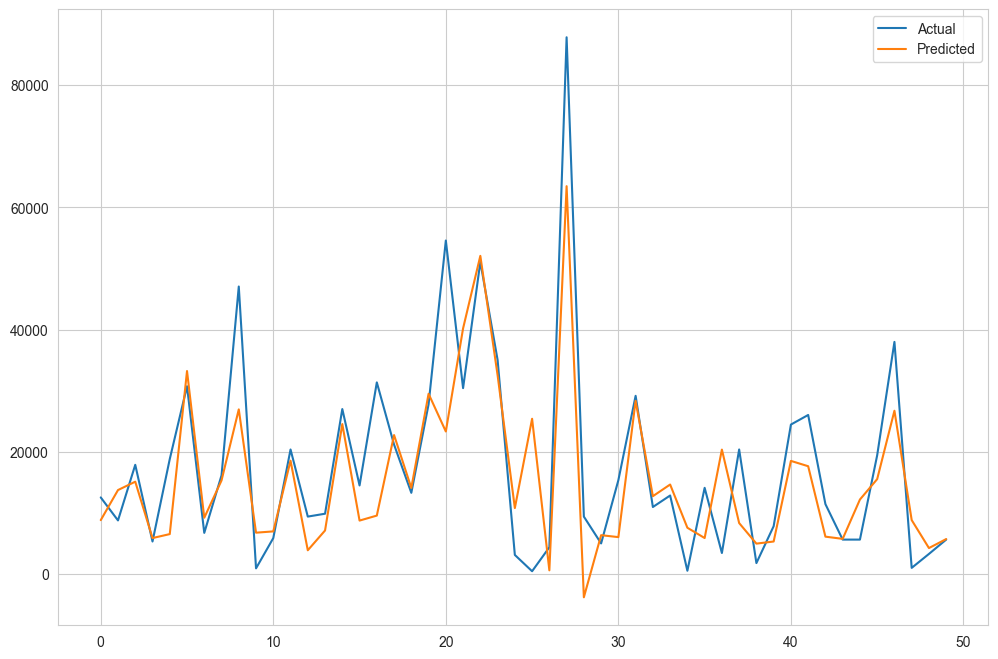

In [90]:
plt.figure(figsize=(12,8))
plt.plot(gx[:50])
plt.legend(['Actual' , 'Predicted'])

In [92]:
print(f"XGBRegressor model")
calPerformance(y_test,y_pred)

XGBRegressor model
mean_absolute_error  [6276.78]
mean_squared_error  [126347760.529]
r2_score  [0.631]


In [93]:
print(f"XGBRegressor model for train data validation")
calPerformance(y_train,y_trainPredicted)

XGBRegressor model for train data validation
mean_absolute_error  [5450.581]
mean_squared_error  [77186930.004]
r2_score  [0.769]
